<h2><font color='#306998'><center>451 Financial Engineering: Programming Assignment 1</center></font></h2>
<h3><center>Hongduo SHAN, JUl 11, 2025</center></h3>


Original schema:
 Schema({'Date': Datetime(time_unit='us', time_zone='UTC'), 'Open': Float64, 'High': Float64, 'Low': Float64, 'Close': Float64, 'Volume': Int64, 'Dividends': Float64, 'Stock Splits': Float64})
Mean model.n_estimators = 1000.000
CV Accuracy: 0.784 ± 0.026
Baseline Accuracy: 0.784 ± 0.026

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.sparse import csr_matrix, issparse
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.sparse import csr_matrix, issparse
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.sparse import csr_matrix, issparse
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/utils/_param_validation.py:11: UserWarning: A NumPy version >=1.23.5 and <2

[CV] END learning_rate=0.04929156746660892, max_depth=5, min_child_weight=9, n_estimators=423, subsample=0.8237997531452609; total time=   0.1s
[CV] END learning_rate=0.04929156746660892, max_depth=5, min_child_weight=9, n_estimators=423, subsample=0.8237997531452609; total time=   0.1s
[CV] END learning_rate=0.27919481459783735, max_depth=11, min_child_weight=6, n_estimators=110, subsample=0.7463084687531312; total time=   0.0s
[CV] END learning_rate=0.27919481459783735, max_depth=11, min_child_weight=6, n_estimators=110, subsample=0.7463084687531312; total time=   0.1s
[CV] END learning_rate=0.27919481459783735, max_depth=11, min_child_weight=6, n_estimators=110, subsample=0.7463084687531312; total time=   0.1s
[CV] END learning_rate=0.27919481459783735, max_depth=11, min_child_weight=6, n_estimators=110, subsample=0.7463084687531312; total time=   0.1s
[CV] END learning_rate=0.28962914158251657, max_depth=10, min_child_weight=6, n_estimators=467, subsample=0.5772105708757717; total 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/compat.py:105: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/xgboost/compat.py:105: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


[CV] END learning_rate=0.28962914158251657, max_depth=10, min_child_weight=6, n_estimators=467, subsample=0.5772105708757717; total time=   0.2s
[CV] END learning_rate=0.10800319550309442, max_depth=3, min_child_weight=2, n_estimators=685, subsample=0.5377671727858433; total time=   0.1s
[CV] END learning_rate=0.04929156746660892, max_depth=5, min_child_weight=9, n_estimators=423, subsample=0.8237997531452609; total time=   0.4s
[CV] END learning_rate=0.11973739528729176, max_depth=6, min_child_weight=5, n_estimators=757, subsample=0.5430591638863436; total time=   0.2s
[CV] END learning_rate=0.06737365263144456, max_depth=7, min_child_weight=6, n_estimators=713, subsample=0.7130186307344488; total time=   0.1s
[CV] END learning_rate=0.10800319550309442, max_depth=3, min_child_weight=2, n_estimators=685, subsample=0.5377671727858433; total time=   0.2s
[CV] END learning_rate=0.28962914158251657, max_depth=10, min_child_weight=6, n_estimators=467, subsample=0.5772105708757717; total tim

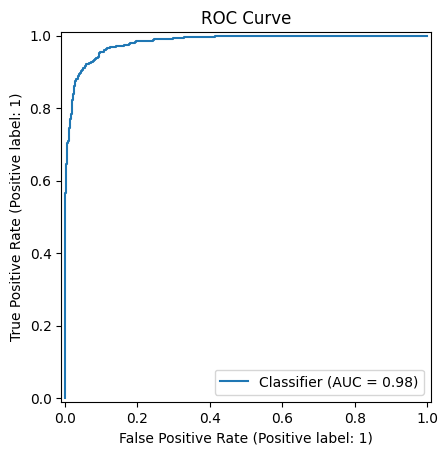

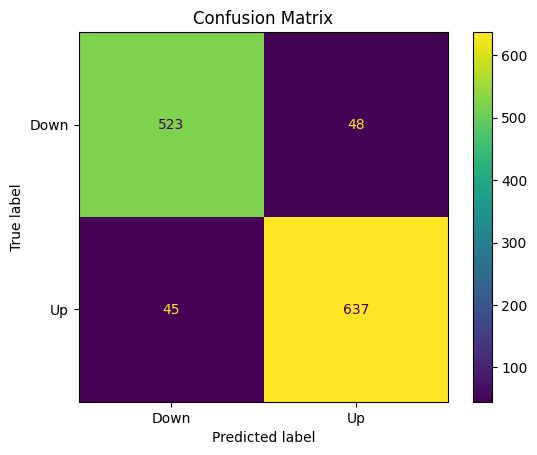

              precision    recall  f1-score   support

        Down       0.92      0.92      0.92       571
          Up       0.93      0.93      0.93       682

    accuracy                           0.93      1253
   macro avg       0.93      0.92      0.93      1253
weighted avg       0.93      0.93      0.93      1253

ROC AUC: 0.982
Precision: 0.930
Recall: 0.934
F1 Score: 0.932


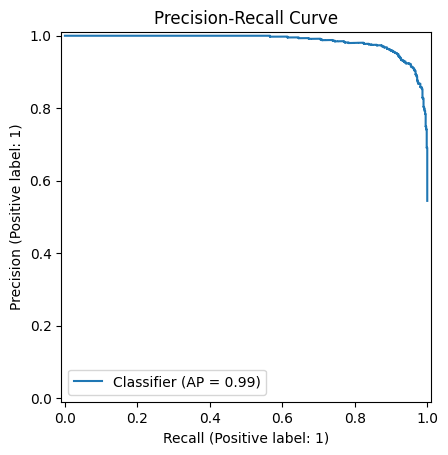

In [3]:
# Imports & Setup
import numpy as np
import pyarrow  # foundation for polars
import polars as pl  # DataFrame work superior to Pandas

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import TimeSeriesSplit, cross_validate, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    log_loss, accuracy_score, classification_report,
    roc_curve, roc_auc_score, RocCurveDisplay,
    ConfusionMatrixDisplay, confusion_matrix,
    precision_score, recall_score, f1_score,
    PrecisionRecallDisplay
)
from scipy.stats import randint, uniform
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance

import warnings
warnings.filterwarnings('ignore')

# Data Loading & Feature Engineering
goog = pl.read_csv("goog_historical_data.csv", try_parse_dates=True)
print("Original schema:\n", goog.schema)
goog = goog.drop(['Dividends', 'Stock Splits'])

# Lagged price features
goog = goog.with_columns([
    pl.col('Close').shift().alias('CloseLag1'),
    pl.col('Close').shift(2).alias('CloseLag2'),
    pl.col('Close').shift(3).alias('CloseLag3'),
])

# High-minus-Low feature
goog = goog.with_columns((pl.col('High') - pl.col('Low')).alias('HML'))
# HML lags
goog = goog.with_columns([
    pl.col('HML').shift().alias('HMLLag1'),
    pl.col('HML').shift(2).alias('HMLLag2'),
    pl.col('HML').shift(3).alias('HMLLag3'),
])

# Open-minus-Close (OMC) feature
goog = goog.with_columns((pl.col('Open') - pl.col('Close')).alias('OMC'))
# OMC lags
goog = goog.with_columns([
    pl.col('OMC').shift().alias('OMCLag1'),
    pl.col('OMC').shift(2).alias('OMCLag2'),
    pl.col('OMC').shift(3).alias('OMCLag3'),
])

# Volume lags
goog = goog.with_columns([
    pl.col('Volume').shift().alias('VolumeLag1'),
    pl.col('Volume').shift(2).alias('VolumeLag2'),
    pl.col('Volume').shift(3).alias('VolumeLag3'),
])

# Binary target: price up/down
goog = goog.with_columns(
    pl.when(pl.col('Close') > pl.col('Close').shift()).then(1).otherwise(0).alias('Target')
)

# Drop rows with nulls after lag creation
goog = goog.drop_nulls()

# Feature matrix & labels
X = goog.drop(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Target'])
y = np.array(goog['Target'])

# Time-series cross-validator
tscv = TimeSeriesSplit(n_splits=5)

# Base XGBoost model
model = XGBClassifier(
    objective='binary:logistic', eval_metric='logloss',
    random_state=2025, n_estimators=1000, use_label_encoder=False
)

# Evaluation function
def evaluate(model, X, y, cv, model_prop=None, model_step=None):
    cv_results = cross_validate(
        model, X.to_numpy(), y,
        cv=cv, scoring=['accuracy'],
        return_estimator=(model_prop is not None)
    )
    if model_prop:
        vals = []
        for est in cv_results['estimator']:
            m = est[model_step] if model_step else est
            vals.append(getattr(m, model_prop))
        print(f"Mean model.{model_prop} = {np.mean(vals):.3f}")
    accs = cv_results['test_accuracy']
    print(f"CV Accuracy: {accs.mean():.3f} ± {accs.std():.3f}")
    return accs.mean(), accs.std()

# Baseline performance
acc_mean, acc_std = evaluate(model, X, y, cv=tscv, model_prop='n_estimators')
print(f"Baseline Accuracy: {acc_mean:.3f} ± {acc_std:.3f}\n")

# Hyperparameter Tuning
param_dist = {
    'max_depth': randint(3, 12),
    'min_child_weight': randint(1, 10),
    'subsample': uniform(0.5, 0.5),
    'learning_rate': uniform(0.01, 0.29),
    'n_estimators': randint(100, 1000),
}

xgb_clf = XGBClassifier(
    objective='binary:logistic', eval_metric='logloss',
    random_state=2025, use_label_encoder=False
)

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='accuracy',
    cv=tscv,
    random_state=2025,
    n_jobs=-1,
    verbose=2
)

random_search.fit(X.to_numpy(), y)
print("Best parameters:", random_search.best_params_)
print("Best CV accuracy:", random_search.best_score_)

# Final model training & evaluation
best_params = random_search.best_params_
finalModel = XGBClassifier(
    objective='binary:logistic', eval_metric='logloss',
    random_state=2025, use_label_encoder=False,
    **best_params
)

finalModel.fit(X.to_numpy(), y)

# Predictions & Probabilities
y_pred = finalModel.predict(X.to_numpy())
y_prob = finalModel.predict_proba(X.to_numpy())[:, 1]

# ROC Curve
RocCurveDisplay.from_predictions(y, y_prob)
plt.title("ROC Curve")
plt.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=["Down","Up"])
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y, y_pred, target_names=["Down","Up"]))

# Additional Metrics & Curves
auc = roc_auc_score(y, y_prob)
prec = precision_score(y, y_pred)
rec = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f"ROC AUC: {auc:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall: {rec:.3f}")
print(f"F1 Score: {f1:.3f}")

PrecisionRecallDisplay.from_predictions(y, y_prob)
plt.title("Precision-Recall Curve")
plt.show()


<h2><font color='#306998'><center>451 Financial Engineering: Programming Assignment 1</center></font></h2>
<h3><center>Thomas W. Miller, June 18, 2025</center></h3>
---